#### **Imports**

In [27]:
## import essential modules 
import qumcmc 
from qumcmc.energy_models import IsingEnergyFunction
from qumcmc.classical_mcmc_routines import *
from qumcmc.quantum_mcmc_routines import *
from qumcmc.basic_utils import *

#### **Define the Energy Model**

In [28]:
# define the model
np.random.seed(12358)# should always be in the same cell!  
n_spins = 20

## construct problem Hamiltonian ##
shape_of_J=(n_spins,n_spins)

## defining J matrix (mutual 1-1 interaction)
J =  np.round(np.random.choice([+1, 0, -1], size=(n_spins, n_spins)), decimals=2)#np.random.uniform(low= -1, high= 1, size= (n_spins, n_spins) )
J = 0.5 * (J + J.transpose() )
J = J - np.diag(np.diag(J))

# defining h
h = np.round(np.random.randn(n_spins), decimals=2)#np.random.uniform(low= -1, high = 1, size= (n_spins))

# instantiate the model
model = IsingEnergyFunction(J, h, name= 'my_model')


            MODEL : my_model
Non-zero Interactions (J) :  248
Non-zero Bias (h) :  20
---------------------------------------------
Average Interaction Strength <J> :  0.0125
Average Bias Strength <h>:  0.02099999999999999
alpha :  0.4864576267958429
model beta :  1.0
---------------------------------------------


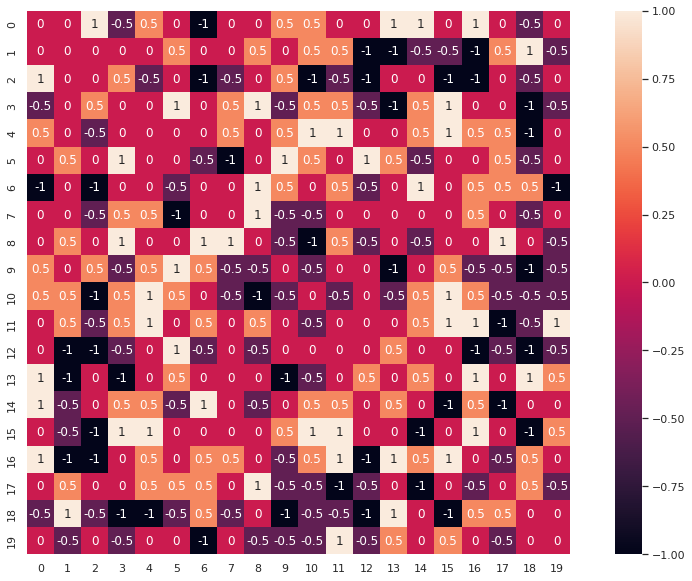

In [29]:
model.model_summary()

#### **Exact Analysis**

In [30]:
## set current beta
beta = 2.4

## run exact sampling over all possible configurations 
model.run_exact_sampling(beta)

Running Exact Sampling | Model beta :  2.4


running over all possible configurations: 100%|██████████| 1048576/1048576 [00:25<00:00, 40865.95it/s]


saving distribution to model ...


In [31]:
model.exact_sampling_status

True

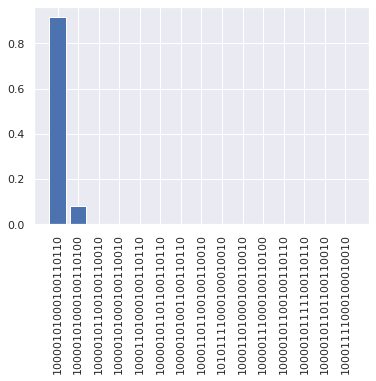

In [32]:
## get the distribution from model
bpd = model.boltzmann_pd

## plot the distribution
plot_bargraph_desc_order(bpd, label= 'Boltzmann Dist.', plot_first_few= 15)

In [33]:
np.random.choice(['0','1'], size= n_spins)

array(['1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1',
       '1', '1', '1', '1', '0', '1', '0'], dtype='<U1')

#### **Run Classical MCMC**

In [34]:
steps = 1000
config_counts_c, proposed_states_c, accepted_states_c =classical_mcmc(
    N_hops=steps,
    model=model,
    return_last_n_states=10,
    return_additional_lists=True,
    temp=0.4,
)

starting with:  10100011100110111011


running MCMC steps ...: 100%|██████████| 1000/1000 [00:00<00:00, 13245.62it/s]


In [35]:
steps = 1000
config_counts_q, proposed_states_q, accepted_states_q =quantum_enhanced_mcmc(
    N_hops=steps,
    model=model,
    return_last_n_states=10,
    return_additional_lists=True,
    temp=0.4,
)

starting with:  11011011011011011110


runnning quantum MCMC steps . ..:  10%|█         | 104/1000 [01:26<19:29,  1.31s/it]

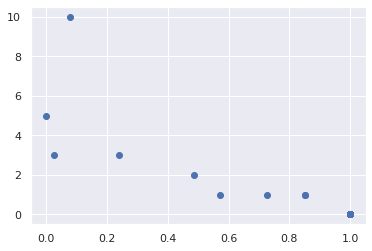

In [ ]:
energy_diff = []; hamming_diff= []; transition_probs= []
traj = accepted_states_q

for s in range(len(traj)-1):
    energy_diff.append(model.get_energy(traj[s]) - model.get_energy(traj[s+1]))
    hamming_diff.append(hamming_dist(traj[s], traj[s+1]))
    transition_probs.append(model.get_boltzmann_prob(traj[s]) / model.get_boltzmann_prob(traj[s+1]) )

plt.scatter(transition_probs, hamming_diff)

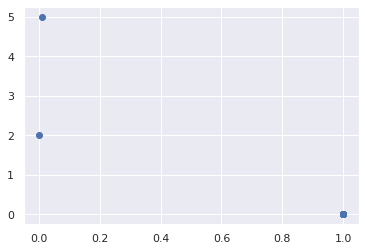

In [ ]:
energy_diff = []; hamming_diff= []; transition_probs= []
traj = accepted_states_c

for s in range(len(traj)-1):
    energy_diff.append(model.get_energy(traj[s]) - model.get_energy(traj[s+1]))
    hamming_diff.append(hamming_dist(traj[s], traj[s+1]))
    transition_probs.append(model.get_boltzmann_prob(traj[s]) / model.get_boltzmann_prob(traj[s+1]) )

plt.scatter(transition_probs, hamming_diff)

#### **Run Quantum Enhaned MCMC**

#### **Convergence Analysis**

##### Magnetisation

##### JS Divergence